In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2002-1-1')['Close']

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4538 entries, 2001-12-31 to 2020-01-09
Data columns (total 4 columns):
PG      4538 non-null float64
MSFT    4538 non-null float64
F       4538 non-null float64
GE      4538 non-null float64
dtypes: float64(4)
memory usage: 177.3 KB


In [6]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
2001-12-31,39.564999,33.125000,15.720000,38.538460
2002-01-02,40.000000,33.520000,16.219999,39.375000
2002-01-03,39.615002,34.615002,16.730000,39.048077
2002-01-04,39.224998,34.450001,16.940001,39.375000
2002-01-07,38.775002,34.279999,16.500000,37.846153


In [16]:
mydata.shift(1).head()

,PG,MSFT,F,GE
Date,,,,
2001-12-31,NaN,NaN,NaN,NaN
2002-01-02,39.564999,33.125000,15.720000,38.538460
2002-01-03,40.000000,33.520000,16.219999,39.375000
2002-01-04,39.615002,34.615002,16.730000,39.048077
2002-01-07,39.224998,34.450001,16.940001,39.375000


In [7]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-01-03,122.580002,158.619995,9.21,11.97
2020-01-06,122.750000,159.029999,9.16,12.14
2020-01-07,121.989998,157.580002,9.25,12.05
2020-01-08,122.510002,160.089996,9.25,11.94
2020-01-09,123.849998,162.089996,9.26,11.91


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [8]:
mydata.iloc[0]

PG      39.564999
MSFT    33.125000
F       15.720000
GE      38.538460
Name: 2001-12-31 00:00:00, dtype: float64

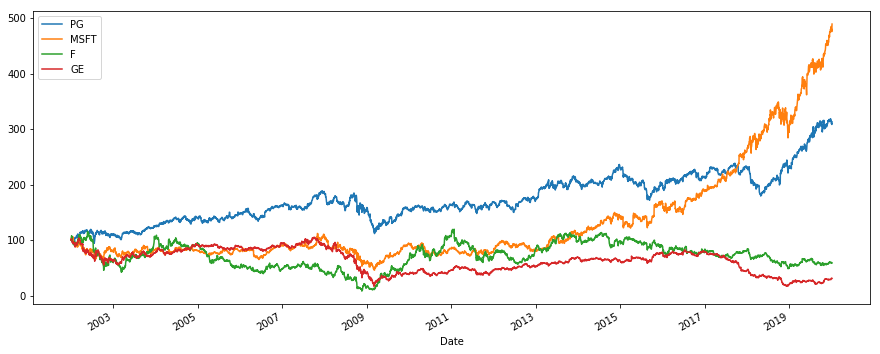

In [9]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

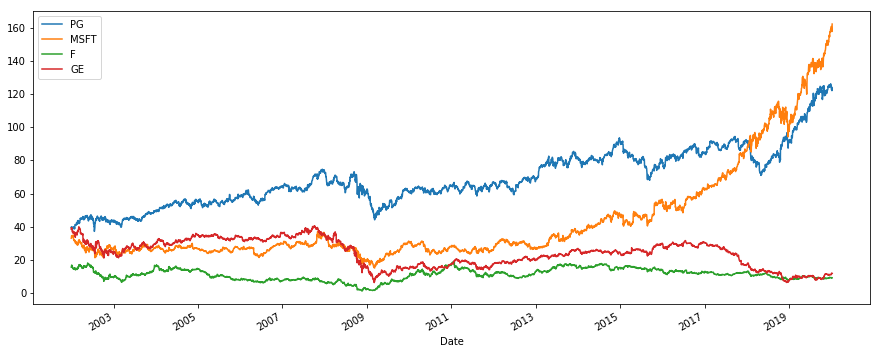

In [10]:
mydata.plot(figsize=(15,6))
plt.show()

In [11]:
mydata.loc['2002-01-02']

PG      40.000000
MSFT    33.520000
F       16.219999
GE      39.375000
Name: 2002-01-02 00:00:00, dtype: float64

In [12]:
mydata.iloc[0]

PG      39.564999
MSFT    33.125000
F       15.720000
GE      38.538460
Name: 2001-12-31 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [14]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
2001-12-31,NaN,NaN,NaN,NaN
2002-01-02,0.010995,0.011925,0.031807,0.021707
2002-01-03,-0.009625,0.032667,0.031443,-0.008303
2002-01-04,-0.009845,-0.004767,0.012552,0.008372
2002-01-07,-0.011472,-0.004935,-0.025974,-0.038828


In [17]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [18]:
np.dot(returns, weights)

array([        nan,  0.01910808,  0.0115455 , ..., -0.00322435,
        0.0027656 ,  0.00549985])

***

In [19]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.077607
MSFT    0.123569
F       0.054775
GE     -0.018782
dtype: float64

In [20]:
np.dot(annual_returns, weights)

0.05929197904237276

In [22]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

5.929 %


***

In [23]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [25]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

5.929 %
8.774999999999999 %
